**Exploratory Data Analysis (EDA) and Business Insights**

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
# Merge datasets for analysis
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Display basic statistics
print("Customers Dataset:\n", customers.info())
print("\nProducts Dataset:\n", products.info())
print("\nTransactions Dataset:\n", transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
Customers Dataset:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB

Products Dataset:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtyp

In [4]:
# Top customers by transaction value
top_customers = merged_data.groupby('CustomerID')["TotalValue"].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Customers by Transaction Value:\n", top_customers)


Top 10 Customers by Transaction Value:
 CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


In [5]:
# Most purchased product categories
category_sales = merged_data.groupby('Category')["Quantity"].sum().sort_values(ascending=False)
print("\nSales by Product Category:\n", category_sales)


Sales by Product Category:
 Category
Books          681
Home Decor     639
Electronics    627
Clothing       590
Name: Quantity, dtype: int64


In [6]:
# Regional distribution of customers
region_distribution = customers['Region'].value_counts()
print("\nRegional Distribution of Customers:\n", region_distribution)


Regional Distribution of Customers:
 Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


In [7]:
# Time-based trends in transactions
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
monthly_sales = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
print("\nMonthly Sales Trend:\n", monthly_sales)


Monthly Sales Trend:
 TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


In [8]:
# Most valuable product categories (by revenue)
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("\nRevenue by Product Category:\n", category_revenue)


Revenue by Product Category:
 Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


# Business Insights
Insight 1: The top 10 customers account for a significant proportion of the revenue, indicating a strong reliance on key accounts.

Insight 2: The most purchased product categories do not always align with the categories generating the highest revenue, suggesting pricing strategies may vary.

Insight 3: Certain regions show a higher concentration of customers, which can guide targeted marketing campaigns.

Insight 4: Monthly sales trends reveal seasonality, with certain months showing higher transaction volumes.

Insight 5: High revenue categories can be prioritized for promotional efforts to maximize profitability.

<ipython-input-11-1b825247df60>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


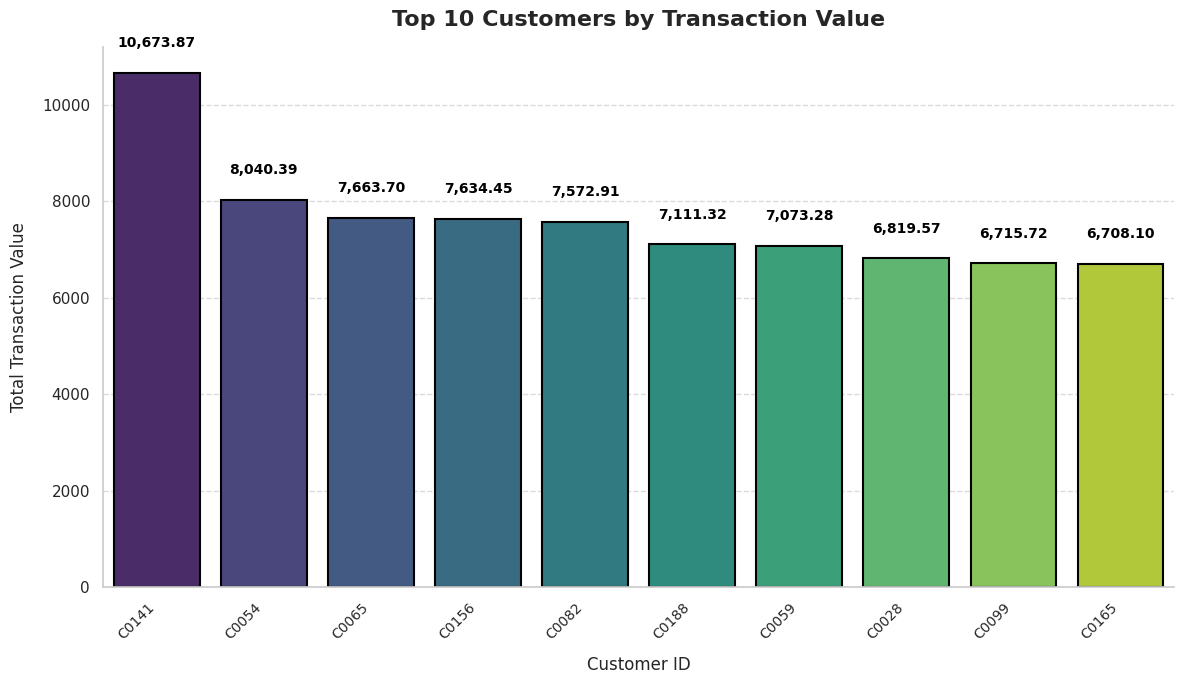

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a theme for consistency
sns.set_theme(style="whitegrid")

# Define the figure size
plt.figure(figsize=(12, 7))

# Create the bar plot with custom color palette
sns.barplot(
    x=top_customers.index,
    y=top_customers.values,
    palette="viridis",
    edgecolor="black",
    linewidth=1.5,
)

# Add title and labels with enhanced styling
plt.title("Top 10 Customers by Transaction Value", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Customer ID", fontsize=12, labelpad=10)
plt.ylabel("Total Transaction Value", fontsize=12, labelpad=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10, ha="right")

# Add annotations on top of each bar
for i, value in enumerate(top_customers.values):
    plt.text(i, value + 0.05 * max(top_customers.values), f"{value:,.2f}",
             ha="center", fontsize=10, color="black", fontweight="bold")

# Remove unnecessary borders
sns.despine()

# Add gridlines for clarity
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

<ipython-input-12-c91ecf53275a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


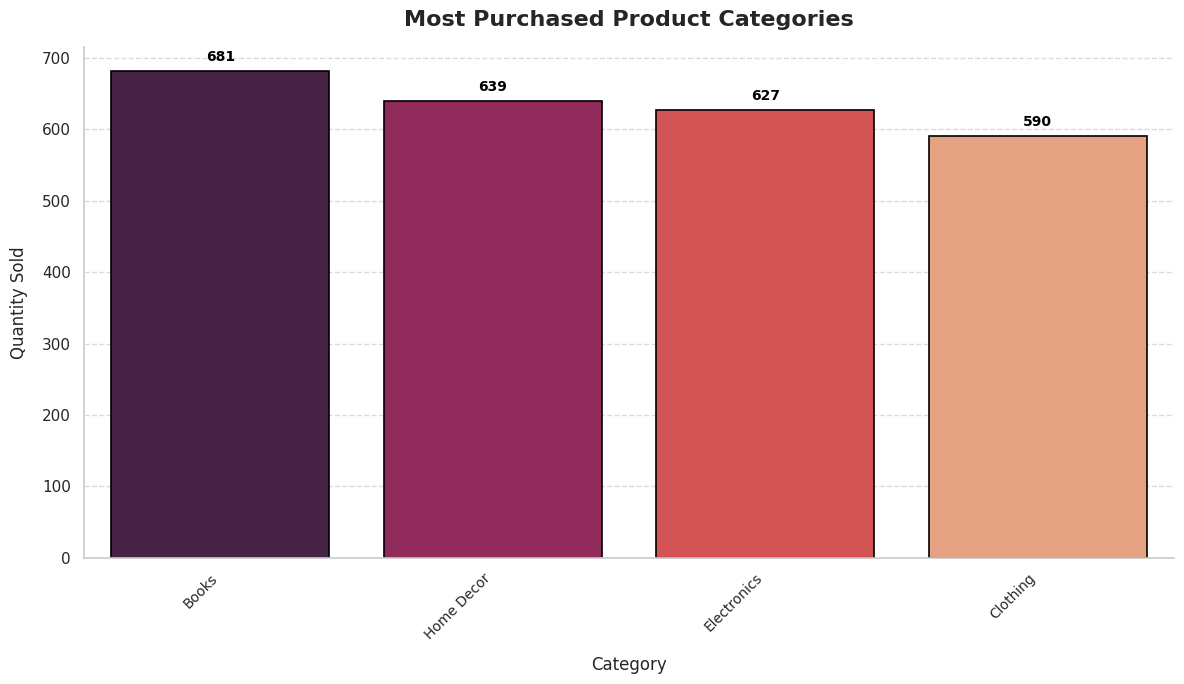

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a theme for consistency
sns.set_theme(style="whitegrid")

# Define the figure size
plt.figure(figsize=(12, 7))

# Create the bar plot with a customized color palette
sns.barplot(
    x=category_sales.index,
    y=category_sales.values,
    palette="rocket",
    edgecolor="black",
    linewidth=1.2,
)

# Add title and labels with enhanced styling
plt.title("Most Purchased Product Categories", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Category", fontsize=12, labelpad=10)
plt.ylabel("Quantity Sold", fontsize=12, labelpad=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10, ha="right")

# Add annotations on top of each bar
for i, value in enumerate(category_sales.values):
    plt.text(i, value + 0.02 * max(category_sales.values), f"{value:,}",
             ha="center", fontsize=10, color="black", fontweight="bold")

# Remove unnecessary borders
sns.despine()

# Add horizontal gridlines for clarity
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout for a cleaner look
plt.tight_layout()

# Display the plot
plt.show()

<ipython-input-20-9f7b0640ea73>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


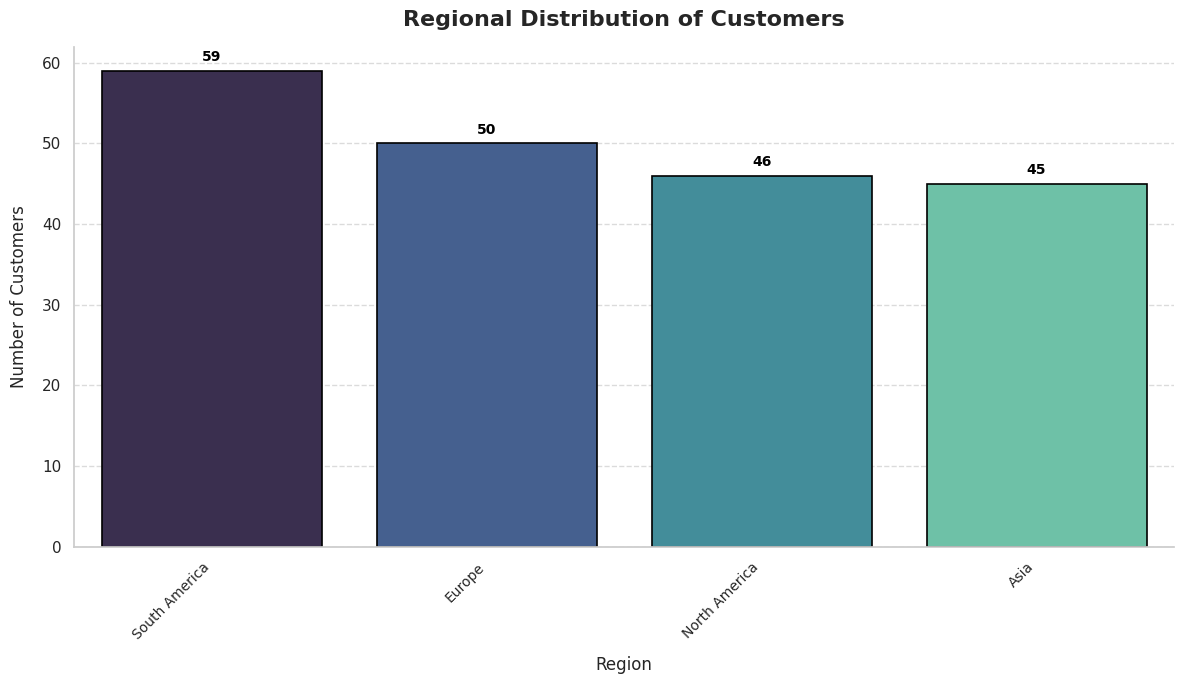

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a theme for consistency
sns.set_theme(style="whitegrid")

# Define the figure size
plt.figure(figsize=(12, 7))

# Create the bar plot with a customized color palette
sns.barplot(
    x=region_distribution.index,
    y=region_distribution.values,
    palette="mako",
    edgecolor="black",
    linewidth=1.2,
    hue=None,
)

# Add title and labels with enhanced styling
plt.title("Regional Distribution of Customers", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Region", fontsize=12, labelpad=10)
plt.ylabel("Number of Customers", fontsize=12, labelpad=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10, ha="right")

# Add annotations on top of each bar
for i, value in enumerate(region_distribution.values):
    plt.text(i, value + 0.02 * max(region_distribution.values), f"{value:,}",
             ha="center", fontsize=10, color="black", fontweight="bold")

# Remove unnecessary borders
sns.despine()

# Add horizontal gridlines for clarity
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

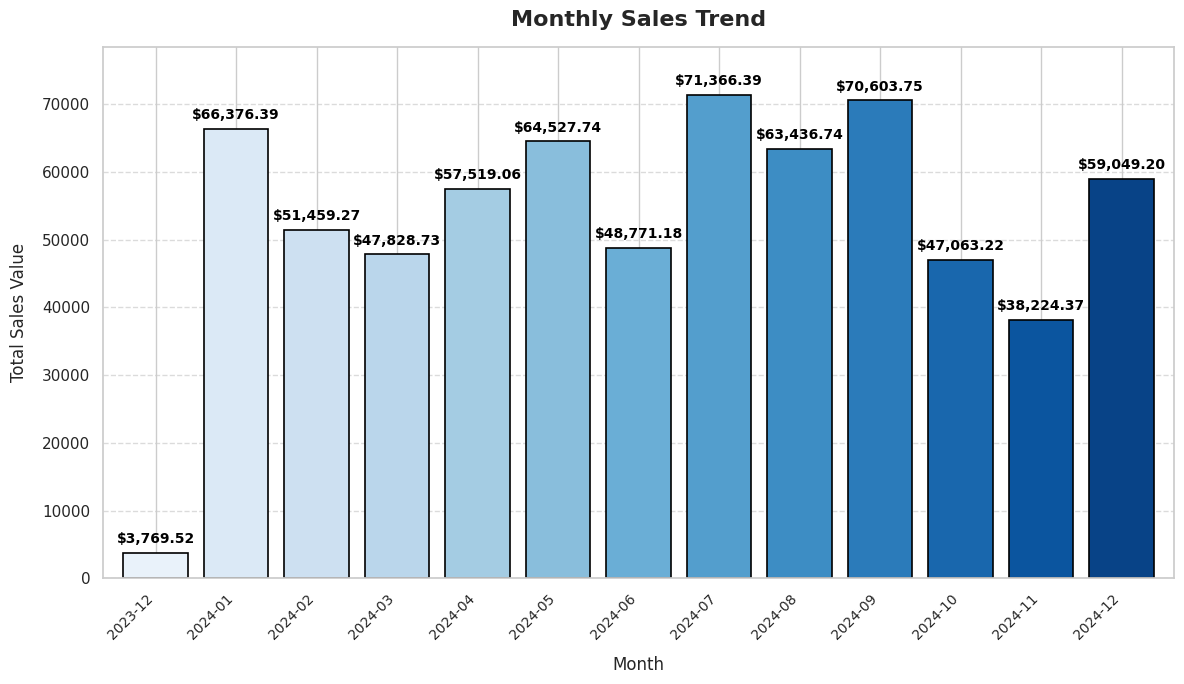

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a theme for consistency
sns.set_theme(style="whitegrid")

# Define the figure size
plt.figure(figsize=(12, 7))

# Create the bar plot using matplotlib for monthly sales
monthly_sales.plot(
    kind="bar",
    color=sns.color_palette("Blues", len(monthly_sales)),
    edgecolor="black",
    linewidth=1.2,
    width=0.8,
)

# Add title and labels with enhanced styling
plt.title("Monthly Sales Trend", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Month", fontsize=12, labelpad=10)
plt.ylabel("Total Sales Value", fontsize=12, labelpad=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10, ha="right")

# Add annotations on top of each bar
for i, value in enumerate(monthly_sales.values):
    plt.text(i, value + 0.02 * max(monthly_sales.values), f"${value:,.2f}",
             ha="center", fontsize=10, color="black", fontweight="bold")

# Add gridlines for better clarity
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add a slight margin for better annotation visibility
plt.ylim(0, max(monthly_sales.values) * 1.1)

# Adjust layout for a cleaner appearance
plt.tight_layout()

# Display the plot
plt.show()

<ipython-input-19-6c745029ac4b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


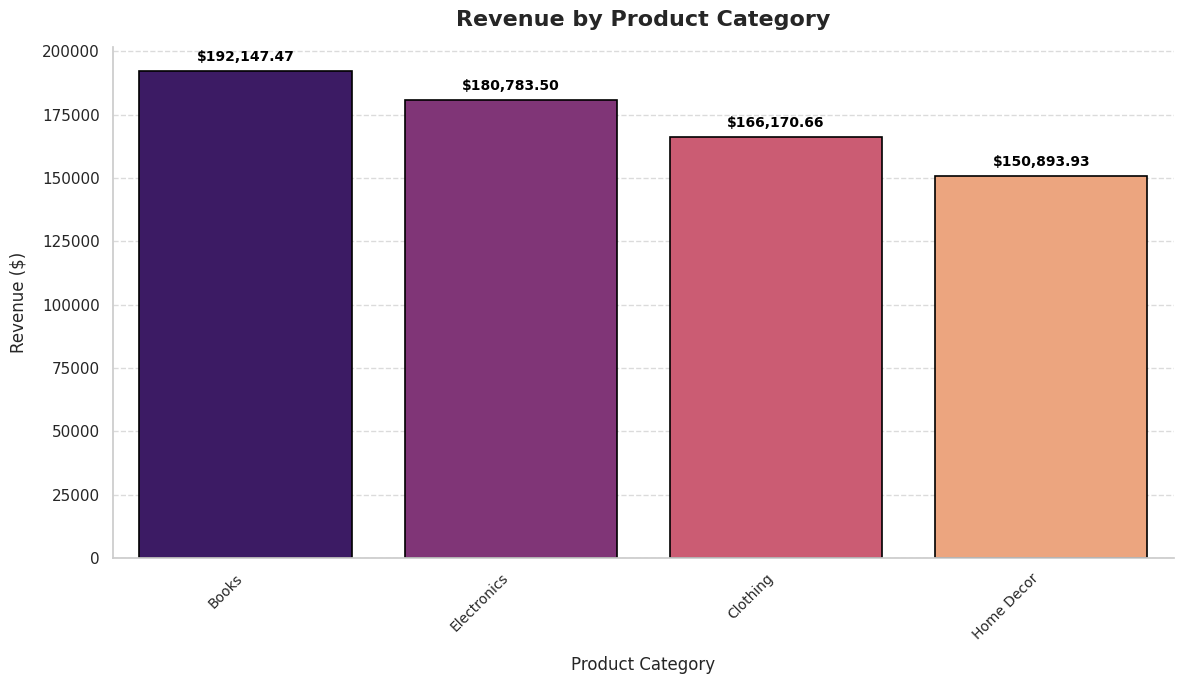

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent theme
sns.set_theme(style="whitegrid")

# Define figure size
plt.figure(figsize=(12, 7))

# Create the bar plot with a customized color palette
sns.barplot(
    x=category_revenue.index,
    y=category_revenue.values,
    palette="magma",
    edgecolor="black",
    linewidth=1.2,
    hue=None,
)

# Add title and labels with improved styling
plt.title("Revenue by Product Category", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Product Category", fontsize=12, labelpad=10)
plt.ylabel("Revenue ($)", fontsize=12, labelpad=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10, ha="right")

# Add annotations on top of each bar
for i, value in enumerate(category_revenue.values):
    plt.text(i, value + 0.02 * max(category_revenue.values), f"${value:,.2f}",
             ha="center", fontsize=10, color="black", fontweight="bold")

# Add gridlines for better clarity
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Remove unnecessary plot borders
sns.despine()

# Adjust layout for a clean appearance
plt.tight_layout()

# Display the plot
plt.show()